In [ ]:
# Import library
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
# load dataset
df=pd.read_csv('/content/drive/MyDrive/dl_lecture/creditcard.csv')

In [ ]:
# displaying first 5 values
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Checking size of creditcard Dataset
df.shape

(284807, 31)

In [ ]:
# check null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# check duplicate values
df.duplicated().sum()

1081

In [ ]:
# drop duplicates value permanently
df.drop_duplicates(inplace=True)

In [ ]:
# check duplicate values
df.duplicated().sum()

0

In [ ]:
#  check  datatypes
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

**Select input and output**

In [ ]:
X=df[['Time','Amount']]
Y=df['Class']

**Train Test Split**

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y)

In [ ]:
# Check data is balanced or not
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

#- Conclusion.
**From the above value_counts of 'Class' Column and from the Graph
There are about: '283253' Transactions out of which '473' were Fraud
Which means the Data is not properly distributed**

**Apply RandomOverSampler to make data equal**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# how many samples of 0 and 1 class in y_train
y_train.value_counts()

0    198277
1       331
Name: Class, dtype: int64

In [ ]:
# apply randomoversampler
# create object of randomoversampler class
ros=RandomOverSampler(random_state=1)

In [ ]:
# use inbuilt method fit_resample() of randomoversampler class
x_train_ros,y_train_ros=ros.fit_resample(x_train,y_train)

In [ ]:
# check 
y_train_ros.value_counts()

0    198277
1    198277
Name: Class, dtype: int64

In [ ]:
# apply testing data ,but first check
y_test.value_counts()

0    84976
1      142
Name: Class, dtype: int64

In [ ]:
# apply randomvesampler on testing data
x_test_ros,y_test_ros=ros.fit_resample(x_test,y_test)

In [ ]:
y_test_ros.value_counts()

0    84976
1    84976
Name: Class, dtype: int64

In [ ]:
# now we can see data is balanced

In [ ]:
#  Now Apply standardscaler  

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train_ros)
x_test=ss.transform(x_test_ros)

In [ ]:
# check no. of rows and columns
df.shape

(283726, 31)

**# Create architecture of neural network**

In [ ]:
# create architecture of neural network
import tensorflow as tf
# create object of neural network
model=tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=2,activation='relu',input_shape=(X.shape[1],)),
  # tf.keras.layers.Dropout(0.1), #apply dropout on 1st hidden layer
  tf.keras.layers.Dense(units=2,activation='relu'),
  # tf.keras.layers.Dropout(0.1),#2nd hidden layer
  tf.keras.layers.Dense(units=1,activation='sigmoid')
])

In [ ]:
# check summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 6         
                                                                 
 dense_7 (Dense)             (None, 2)                 6         
                                                                 
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model 
# inbuilt method compile() of sequential class
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# create a procedure for callback(earlystoping)
#Early Stopping : 
#EarlyStopping : for decide epoch
#create a procedure for callback 
from tensorflow.keras.callbacks import EarlyStopping             
#create callback : -
#EarlyStopping() inbuilt function
cb=EarlyStopping(
    monitor="val_loss",  #val_loss means testing error
    min_delta=0.0001, #value of lambda 
    patience=12,
    verbose=1,
    mode="auto", #min loss 
    baseline=None,
    restore_best_weights=False
)

In [ ]:
# train the model
trained_model=model.fit(x_train_ros,y_train_ros,epochs=1000,batch_size=500,
                        validation_split=0.2,
                        callbacks=cb)
# validation_split=0.2 means take 20% data for validattion from x_train,y_train

Epoch 1/1000
635/635 [==============================] - 2s 2ms/step - loss: 0.6720 - accuracy: 0.6250 - val_loss: 0.9230 - val_accuracy: 0.0000e+00
Epoch 2/1000
635/635 [==============================] - 1s 2ms/step - loss: 0.6618 - accuracy: 0.6250 - val_loss: 0.9789 - val_accuracy: 0.0000e+00
Epoch 3/1000
635/635 [==============================] - 1s 2ms/step - loss: 0.6616 - accuracy: 0.6250 - val_loss: 0.9838 - val_accuracy: 0.0000e+00
Epoch 4/1000
635/635 [==============================] - 1s 2ms/step - loss: 0.6616 - accuracy: 0.6250 - val_loss: 0.9828 - val_accuracy: 0.0000e+00
Epoch 5/1000
635/635 [==============================] - 1s 2ms/step - loss: 0.6616 - accuracy: 0.6250 - val_loss: 0.9770 - val_accuracy: 0.0000e+00
Epoch 6/1000
635/635 [==============================] - 1s 2ms/step - loss: 0.6616 - accuracy: 0.6250 - val_loss: 0.9815 - val_accuracy: 0.0000e+00
Epoch 7/1000
635/635 [==============================] - 1s 2ms/step - loss: 0.6616 - accuracy: 0.6250 - val_loss

In [ ]:
#training loss and training score
# model evaluation
model.evaluate(x_train_ros,y_train_ros)

12393/12393 [==============================] - 16s 1ms/step - loss: 0.7253 - accuracy: 0.5000


[0.7252541780471802, 0.5]

In [ ]:
# testing loss and testing accuracy
model.evaluate(x_test_ros,y_test_ros)

5311/5311 [==============================] - 11s 2ms/step - loss: 0.7252 - accuracy: 0.5000


[0.7252253293991089, 0.5]

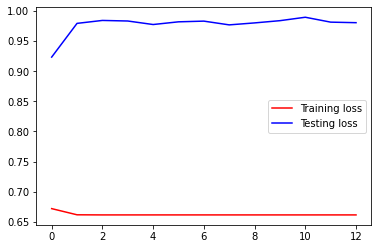

In [ ]:
# visualization
plt.plot(trained_model.history['loss'],color='red',label='Training loss')
plt.plot(trained_model.history['val_loss'],color='blue',label='Testing loss')
plt.legend()
plt.show()

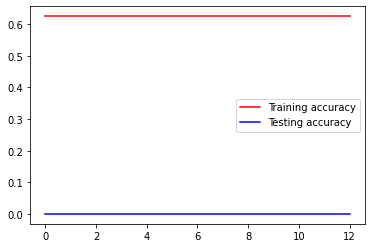

In [ ]:
plt.plot(trained_model.history['accuracy'],color='red',label='Training accuracy')
plt.plot(trained_model.history['val_accuracy'],color='blue',label='Testing accuracy')
plt.legend()
plt.show()

In [ ]:
# testing the model
y_pred=model.predict(x_test_ros) #gives the probability value of each class for each row
y_pred

array([[0.3752988],
       [0.3752988],
       [0.3752988],
       ...,
       [0.3752988],
       [0.3752988],
       [0.3752988]], dtype=float32)

In [ ]:
y_pred=np.where(y_pred>=0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_ros,y_pred))
print(confusion_matrix(y_test_ros,y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     84976
           1       0.00      0.00      0.00     84976

    accuracy                           0.50    169952
   macro avg       0.25      0.50      0.33    169952
weighted avg       0.25      0.50      0.33    169952

[[84976     0]
 [84976     0]]


In [ ]:
# here clearly,model is overfit why ?
# because training score>testing score
# means training error<testing error
# to reduced overfit,use regularisation technique

In [ ]:
#call the class regularizers : inbuilt class
from tensorflow.keras import regularizers
#regularizers inbuilt class of keras 

In [ ]:
model1=tf.keras.Sequential([
    #first hidden layer
    tf.keras.layers.Dense(units=7,activation='relu',input_shape=(X.shape[1],),
            kernel_regularizer=regularizers.l2(0.01)),
    #2nd hidden layer #units(neuron)
  tf.keras.layers.Dense(units=7,activation='relu',
                        kernel_regularizer=regularizers.l2(0.5)),#second hidden layer
   #o/p layer
  tf.keras.layers.Dense(units=1,activation='sigmoid',
                        kernel_regularizer=regularizers.l2(0.5))#output layer
])

In [ ]:
#complie the model 
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# create a procedure for callback(earlystoping)
#Early Stopping : 
#EarlyStopping : for decide epoch
#create a procedure for callback 
from tensorflow.keras.callbacks import EarlyStopping             
#create callback : -
#EarlyStopping() inbuilt function
cb=EarlyStopping(
    monitor="val_loss",  #val_loss means testing error
    min_delta=0.00001, #value of lambda 
    patience=20,
    verbose=1,
    mode="auto", #min loss 
    baseline=None,
    restore_best_weights=False
)

In [ ]:
# train the model
trained_model1=model.fit(x_train_ros,y_train_ros,epochs=4000,batch_size=100,
                        validation_data=(x_test_ros,y_test_ros),
                        callbacks=cb)

Epoch 1/4000
3966/3966 [==============================] - 8s 2ms/step - loss: 0.6937 - accuracy: 0.4992 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/4000
3966/3966 [==============================] - 8s 2ms/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/4000
3966/3966 [==============================] - 12s 3ms/step - loss: 0.6932 - accuracy: 0.4995 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/4000
3966/3966 [==============================] - 8s 2ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/4000
3966/3966 [==============================] - 9s 2ms/step - loss: 0.6932 - accuracy: 0.5012 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/4000
3966/3966 [==============================] - 9s 2ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/4000
3966/3966 [==============================] - 8s 2ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6931 

In [ ]:
#training loss and training score
# model evaluation
model.evaluate(x_train_ros,y_train_ros)

12393/12393 [==============================] - 16s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931854486465454, 0.5]

In [ ]:
# testing loss and testing accuracy
model.evaluate(x_test_ros,y_test_ros)

5311/5311 [==============================] - 9s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931840777397156, 0.5]

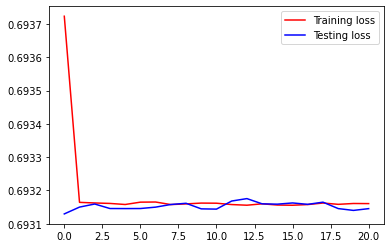

In [ ]:
# visualization
plt.plot(trained_model1.history['loss'],color='red',label='Training loss')
plt.plot(trained_model1.history['val_loss'],color='blue',label='Testing loss')
plt.legend()
plt.show()

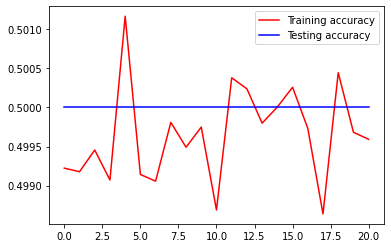

In [ ]:
plt.plot(trained_model1.history['accuracy'],color='red',label='Training accuracy')
plt.plot(trained_model1.history['val_accuracy'],color='blue',label='Testing accuracy')
plt.legend()
plt.show()

In [ ]:
# testing the model
y_pred=model.predict(x_test_ros) #gives the probability value of each class for each row
y_pred

array([[0.5013064],
       [0.5013064],
       [0.5013064],
       ...,
       [0.5013064],
       [0.5013064],
       [0.5013064]], dtype=float32)

In [ ]:
y_pred=np.where(y_pred>=0.5,1,0)
y_pred

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_ros,y_pred))
print(confusion_matrix(y_test_ros,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00     84976
           1       0.50      1.00      0.67     84976

    accuracy                           0.50    169952
   macro avg       0.75      0.50      0.33    169952
weighted avg       0.75      0.50      0.33    169952

[[   22 84954]
 [    0 84976]]


In [ ]:
# after using regularization on dataset 
# accuracy decreasing it means this dataset is not overfit
# there is no need to use regularizer in this dataset